<a href="https://colab.research.google.com/github/hasanzeynal/Tensorflow-Developer-Certificate/blob/main/01_Neural_Network_Regression_in_TensorFlow/neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

In [90]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [127]:
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# Basic Neural Network Model for Regression Problem
Then, After building our basic NN model, we are gonna try:
* improving our model
* evaluating
* setting
* saving
* loading
* processing with feature scalling(normalising, fitting model on a scaled data)

## Building Basic Model in TensorFlow

## Creating Data, So we can model it

In [91]:
X = tf.constant([-1,1,3,5,7,9,11,13,15,17,19,21,23])
y = tf.constant([9,11,13,15,17,19,21,23,25,27,29,31,33])  #the difference between X and y is 10

In [92]:
#looking for the input and output shape
X.shape,y.shape  #just we are gonna need comma in the tensoor shape after 14 so shape is (14,)

(TensorShape([13]), TensorShape([13]))

### Steps in Modelling in TensorFlow.
1. **Creating Model** - define imput, output, hidden layers of our Deep Learning Model.

2. **Compiling Model** - define the loss function(the function which tell us how wrong our model is), define optimizer(which tell us our model how improve) and evaluation metrics(we can use to interpret the performance of our model).

3. Fitting Model - letting the model try to find patterns between X and y(features and labels)

In [93]:
#change 1 rank tensoir to the 2 rank tensor
tf.expand_dims(X,-1)

<tf.Tensor: shape=(13, 1), dtype=int32, numpy=
array([[-1],
       [ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23]], dtype=int32)>

In [94]:
#creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
#adding dense layer with the 1 neuron
#model.add(tf.keras.layers.Dense(1, input_shape = (14,)))
#model.add(tf.keras.layers.Dense(1))

#compiling the model
model.compile(loss= tf.keras.losses.mae,  #MAE stands for the Mean Absolute Error
              optimizer= tf.keras.optimizers.SGD(), #SGD stands for the Stochastic Gradient Error
              metrics= ['mae'])

#fitting the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs= 5)  #axis= -1 makes 2 rank tensor,1 rank tensor is caused an error

Epoch 1/5
1/1 [==============================] - 1s 956ms/step - loss: 13.7874 - mae: 13.7874
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 12.5674 - mae: 12.5674
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3474 - mae: 11.3474
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.1274 - mae: 10.1274
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 8.9074 - mae: 8.9074


In [95]:
#trying make prediction based on X for y
model.predict([25])     #if our model is good enough, the answer would be around 35

1/1 [==============================] - 0s 96ms/step


array([[30.192247]], dtype=float32)

## Improving our model

### Creating new model to improve our result

In [96]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = True)

In [97]:
#create a model(specified to your probelm)
improved_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#compile model
improved_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                       metrics = ['mae'])

#fit the model with the subset of X and y and 100 epochs
improved_model.fit(tf.expand_dims(X_train,axis= 1),y_train,epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 22.4815 - mae: 22.4815
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 21.8554 - mae: 21.8554
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 21.2423 - mae: 21.2423
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 20.6693 - mae: 20.6693
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 20.1105 - mae: 20.1105
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 19.5497 - mae: 19.5497
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 18.9957 - mae: 18.9957
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 18.4356 - mae: 18.4356
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 17.8655 - mae: 17.8655
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 17.2761 - mae: 17.2761
Epoch 11/100
1/1 [==============================] -

In [98]:
#let's see the result by doing prediction in the same way as we did before on 'model'
improved_model.predict([21])     #so much closer as you see, better and more usefull

1/1 [==============================] - 0s 298ms/step


array([[32.928986]], dtype=float32)

### See if we even can do more changes to get more better predictions


In [105]:
#create the model with extra hidden layer(100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),   #1 hidden layer is added with 100 hidden units
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr = 0.0001),   #lr is changed
              metrics = ['mae'])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 150)  #number of epochs is changed

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 22.5704 - mae: 22.5704
Epoch 2/150
1/1 [==============================] - 0s 12ms/step - loss: 21.9628 - mae: 21.9628
Epoch 3/150
1/1 [==============================] - 0s 12ms/step - loss: 21.3601 - mae: 21.3601
Epoch 4/150
1/1 [==============================] - 0s 13ms/step - loss: 20.7978 - mae: 20.7978
Epoch 5/150
1/1 [==============================] - 0s 10ms/step - loss: 20.2495 - mae: 20.2495
Epoch 6/150
1/1 [==============================] - 0s 12ms/step - loss: 19.7106 - mae: 19.7106
Epoch 7/150
1/1 [==============================] - 0s 10ms/step - loss: 19.1826 - mae: 19.1826
Epoch 8/150
1/1 [==============================] - 0s 11ms/step - loss: 18.6373 - mae: 18.6373
Epoch 9/150
1/1 [==============================] - 0s 11ms/step - loss: 18.0874 - mae: 18.0874
Epoch 10/150
1/1 [==============================] - 0s 10ms/step - loss: 17.5181 - mae: 17.5181
Epoch 11/150
1/1 [==============================] -

In [106]:
#making prediction again
model.predict([21])     #a litle bit better rather than our second model and way much better than first model

1/1 [==============================] - 0s 113ms/step


array([[32.198402]], dtype=float32)

## Evaluating Model
When it comes to the evaluation, there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

In [107]:
#make a bigger dataset
X = tf.range(-200,300,10)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100,
        -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,
         20,   30,   40,   50,   60,   70,   80,   90,  100,  110,  120,
        130,  140,  150,  160,  170,  180,  190,  200,  210,  220,  230,
        240,  250,  260,  270,  280,  290], dtype=int32)>

In [108]:
y = X + 15
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-185, -175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,
        -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,
         35,   45,   55,   65,   75,   85,   95,  105,  115,  125,  135,
        145,  155,  165,  175,  185,  195,  205,  215,  225,  235,  245,
        255,  265,  275,  285,  295,  305], dtype=int32)>

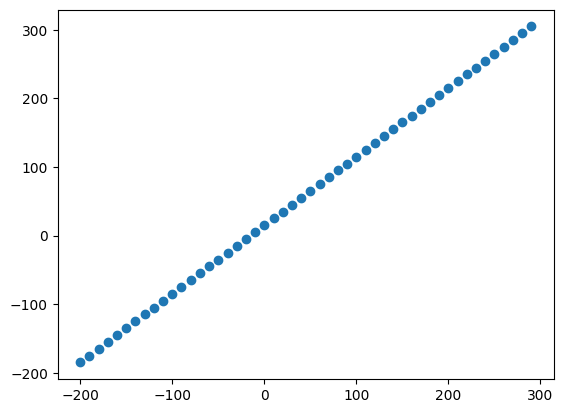

In [110]:
#visualize data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

### 3 sets....
* Train Test
* Validation Test
* Test Set


In [115]:
#split X to the train and test set
X_train = X[:40]
X_test = X[40:]
#split y too
y_train = y[:40]
y_test = y[40:]

### Visulising dataset
Now we have got our data in the training and test datasets

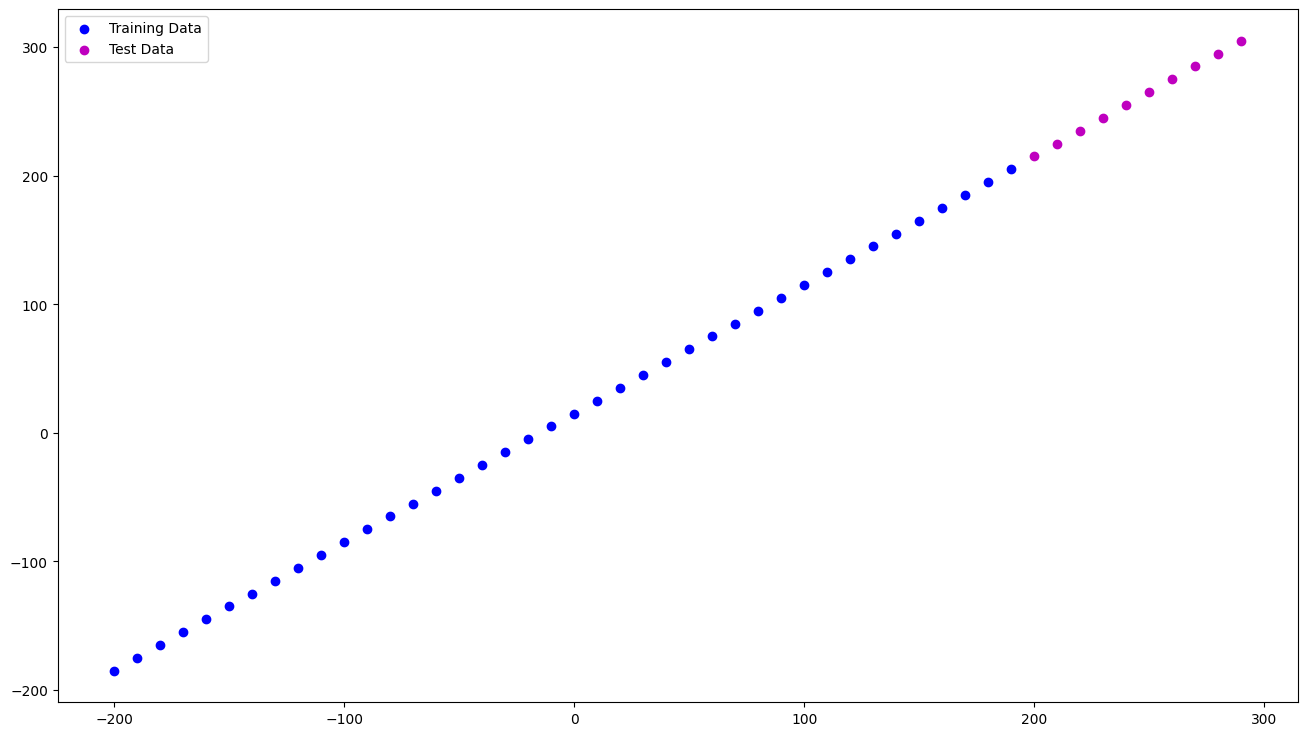

In [130]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c='b',label = 'Training Data')
plt.scatter(X_test,y_test,c= 'm',label = 'Test Data')
plt.legend()
plt.show()

### Let's visualise our model predictions,training and test set

In [135]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.0001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 100,batch_size = 10)

Epoch 1/100
4/4 [==============================] - 2s 5ms/step - loss: 91.8544 - mae: 91.8544
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 76.2199 - mae: 76.2199
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 59.6623 - mae: 59.6623
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 38.8772 - mae: 38.8772
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 15.8847 - mae: 15.8847
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 12.3368 - mae: 12.3368
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 15.0697 - mae: 15.0697
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 11.1443 - mae: 11.1443
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 11.7263 - mae: 11.7263
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 9.5285 - mae: 9.5285
Epoch 11/100
4/4 [==============================] - 0s 4ms/st

In [136]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 56ms/step


In [137]:
predictions

array([[223.98941],
       [234.95276],
       [245.91614],
       [256.8795 ],
       [267.84286],
       [278.80624],
       [289.76962],
       [300.73297],
       [311.69632],
       [322.65973]], dtype=float32)

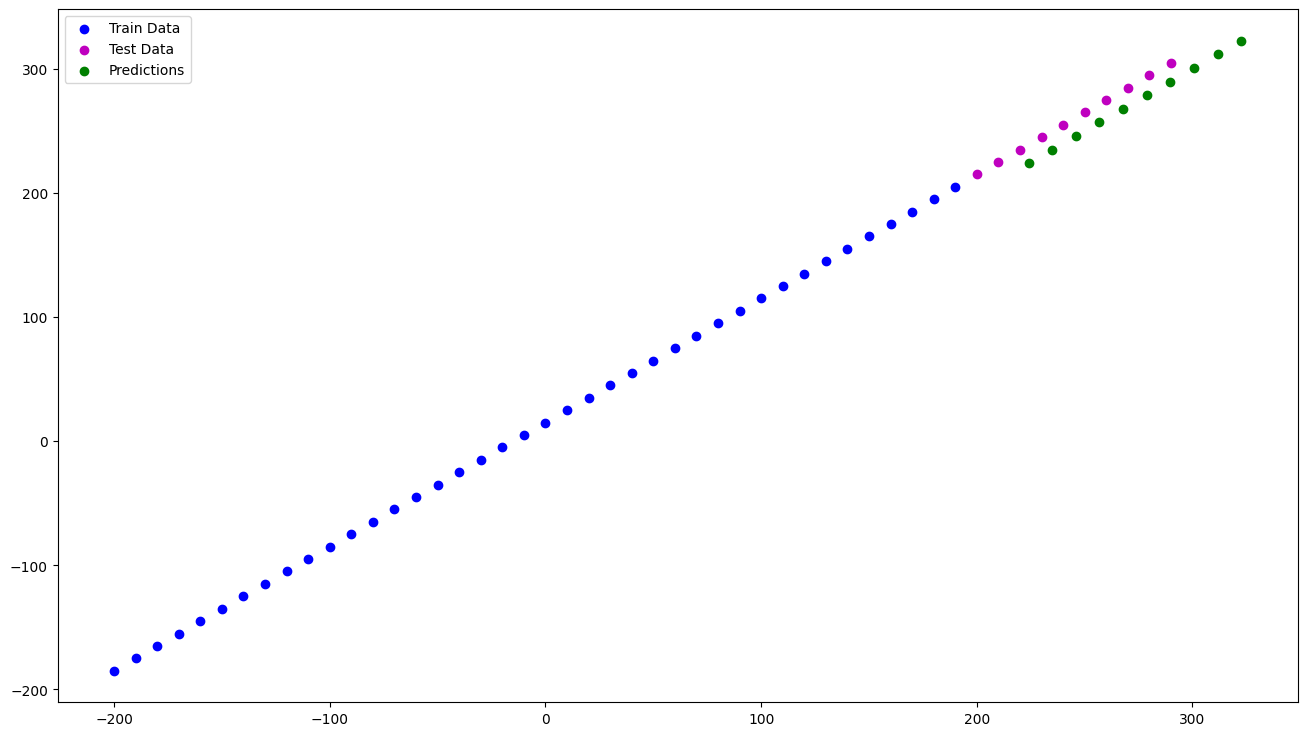

In [138]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c= 'b',label = 'Train Data')
plt.scatter(X_test,y_test,c= 'm',label= 'Test Data')
plt.scatter(predictions,predictions,c ='g',label= 'Predictions')
plt.legend()
plt.show()